# Project \#1 Code: 
### Lucas Swidler

The data I will be using is: 
- [Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

In [ ]:
from google.colab import drive
import pandas as pd
import numpy
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
heart = pd.read_csv('/content/drive/MyDrive/CS167/heart.csv')
heart.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Problem: 
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

*I'm going to be using the heart disease dataset. What are the most important predictor variables for determining whether or not someone has heart disease? Given the data, how accurate can machine learning models be at predicting heart disease?*

*My target variable is going to be HeartDisease, which is either 1 or 0, and my predictor variables are going to be every other column, like Age, Sex, ChestPainType, RestingBP, Cholesterol, and more.*

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

*First, I checked the dataset to see if there were any missing values. Luckily, there weren't any so I was able to save time. Next, I created dummy variables for the 5 categorial predictor variables, which were Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope. Lastly, I normalized the predictor variables that seemed to have larger ranges of values so as to not skew the results. These were Age, RestingBP, Cholesterol, and MaxHR. With this, each variable is numerical while being on a scale that is generally around 0.*

In [ ]:
# Checking for missing values
print('Are there missing values?', heart.columns.isna())

# Creating any dummy variables
# Columns needed to change are Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
heart_dummies = pd.get_dummies(heart, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
heart_dummies.head()

# Normalizing columns
# Columns that need to be normalized are Age, RestingBP, Cholesterol, and MaxHR
a_mean = heart_dummies['Age'].mean()
a_std = heart_dummies['Age'].std()
heart_dummies['Age'] = (heart_dummies['Age'] - a_mean)/a_std

r_mean = heart_dummies['RestingBP'].mean()
r_std = heart_dummies['RestingBP'].std()
heart_dummies['RestingBP'] = (heart_dummies['RestingBP'] - r_mean)/r_std

c_mean = heart_dummies['Cholesterol'].mean()
c_std = heart_dummies['Cholesterol'].std()
heart_dummies['Cholesterol'] = (heart_dummies['Cholesterol'] - c_mean)/c_std

m_mean = heart_dummies['MaxHR'].mean()
m_std = heart_dummies['MaxHR'].std()
heart_dummies['MaxHR'] = (heart_dummies['MaxHR'] - m_mean)/m_std

# Due to an issue with creating the confusion matrix, I will change the target column to strings instead of integers
heart_dummies['HeartDisease'] = heart_dummies['HeartDisease'].replace(to_replace=0, value='False')
heart_dummies['HeartDisease'] = heart_dummies['HeartDisease'].replace(to_replace=1, value='True')

heart_dummies.head()

Are there missing values? [False False False False False False False False False False False False]


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.410685,0.824621,0,1.382175,0.0,False,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478223,1.490940,-0.171867,0,0.753746,1.0,True,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.750404,-0.129442,0.769768,0,-1.524307,0.0,False,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584238,0.302660,0.138964,0,-1.131539,1.5,True,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051853,0.950812,-0.034736,0,-0.581664,0.0,False,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

*I'll be using accuracy as well as a confusion matrix to test this model. As the target variable is categorial, it does not make sense to use a regression metric like MAE, MSE, or R squared. As Accuracy doesn't let you see false positives or false negatives, a confusion matrix will be used as well.*

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

*For a baseline, I used a classifier dummy to match the target variable. I tested 3 different guessing methods for the dummy - guesses based on the distribution of the target variable, random guesses, and constant guesses. I expected all of them to be around an accuracy of 0.5, or about a 50% chance of being correct. They ended up yielding values of 0.505, 0.5 exactly, and 0.52. None of these were far from the 50% chance I was predicting.*

In [ ]:
# Splitting the data
target = 'HeartDisease'
predictors = heart_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(heart_dummies[predictors], heart_dummies[target], test_size = 0.2, random_state = 4)

dummy_clf = DummyClassifier(strategy = 'stratified') # Making guesses based on target distribution
dummy_clf.fit(train_data, train_sln)
preds1 = dummy_clf.predict(test_data)

dummy_clf = DummyClassifier(strategy = 'uniform') # Making random guesses
dummy_clf.fit(train_data, train_sln)
preds2 = dummy_clf.predict(test_data)

dummy_clf = DummyClassifier(strategy = 'most_frequent') # Always guesses the most common answer
dummy_clf.fit(train_data, train_sln)
preds3 = dummy_clf.predict(test_data)

print('Stratified Accuracy: ', accuracy_score(test_sln, preds1))
print('Random Accuracy: ', accuracy_score(test_sln, preds2))
print('Most Frequent Result Accuracy: ', accuracy_score(test_sln, preds3))

Stratified Accuracy:  0.5217391304347826
Random Accuracy:  0.47282608695652173
Most Frequent Result Accuracy:  0.5217391304347826


# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


In [ ]:
# kNN
knn = neighbors.KNeighborsClassifier(n_neighbors = 30)
knn.fit(train_data, train_sln)
knn_predictions = knn.predict(test_data)
print('KNN Accuracy: ', metrics.accuracy_score(test_sln, knn_predictions))

# Print the Confusion Matrix for the  k nearest neighbors
knn_vals = heart_dummies[target].unique() # Gives the possibilities for the target variable, HeartDisease - True or False
knn_conf_mat = metrics.confusion_matrix(test_sln, knn_predictions, labels = knn_vals)
print(pd.DataFrame(knn_conf_mat, index = "Actual " + knn_vals, columns = "Predicted " + knn_vals))

print('\n')
# Decision Tree
dt = tree.DecisionTreeClassifier(max_features = 20, random_state = 41)
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)
print("DT Accuracy:", metrics.accuracy_score(test_sln, dt_predictions))

# Print the Confusion Matrix for the decision tree
dt_vals = heart_dummies[target].unique() # Gives the possibilities for the target variable, HeartDisease - True or False
dt_conf_mat = metrics.confusion_matrix(test_sln, dt_predictions, labels = dt_vals)
print(pd.DataFrame(dt_conf_mat, index = "Actual " + dt_vals, columns = "Predicted " + dt_vals))

KNN Accuracy:  0.9130434782608695
              Predicted False  Predicted True
Actual False               77              11
Actual True                 5              91


DT Accuracy: 0.8315217391304348
              Predicted False  Predicted True
Actual False               72              16
Actual True                15              81


In [ ]:
# Build the Random Forest
forest = RandomForestClassifier(random_state = 11, n_estimators = 100)
forest.fit(train_data,train_sln)
forest_predictions = forest.predict(test_data)
print('Random Forest Accuracy: ', metrics.accuracy_score(test_sln, forest_predictions))

# Print the Confusion Matrix for the random forest
forest_vals = heart_dummies[target].unique() # Gives the possibilities for the target variable, HeartDisease - True or False
forest_conf_mat = metrics.confusion_matrix(test_sln, forest_predictions, labels = forest_vals)
print(pd.DataFrame(forest_conf_mat, index = "Actual " + forest_vals, columns = "Predicted " + forest_vals))

print('\n')
# Using wKNN for predictions
wknn = neighbors.KNeighborsClassifier(n_neighbors = 30, weights = 'distance')
wknn.fit(train_data, train_sln)
wknn_predictions = wknn.predict(test_data)
print('wKNN Accuracy: ', metrics.accuracy_score(test_sln, wknn_predictions))

# Print the Confusion Matrix for the weighted k nearest neighbors
wknn_vals = heart_dummies[target].unique() # Gives the possibilities for the target variable, HeartDisease - True or False
wknn_conf_mat = metrics.confusion_matrix(test_sln, wknn_predictions, labels = wknn_vals)
print(pd.DataFrame(wknn_conf_mat, index = "Actual " + wknn_vals, columns = "Predicted " + wknn_vals))

Random Forest Accuracy:  0.8804347826086957
              Predicted False  Predicted True
Actual False               72              16
Actual True                 6              90


wKNN Accuracy:  0.9130434782608695
              Predicted False  Predicted True
Actual False               77              11
Actual True                 5              91


# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune?

*To conclude, my random forest produced an accuracy of 0.88 with 16 false positives and 6 false negatives. My weighted k nearest neighbors had an accuracy of 0.91, with fewer false positives and negatives which were 11 and 5 respectively.*

*As for my knn and decision tree, both of those had similar accuracies to wknn and the random forest. While the knn actually had an identical confusion matrix to wknn, the decision tree was far less accurate than the other models. I tuned the max_features parameter which did increase the accuracy slightly.*

*I created the following visualizations/graphs to help answer some of the questions I had initially.*

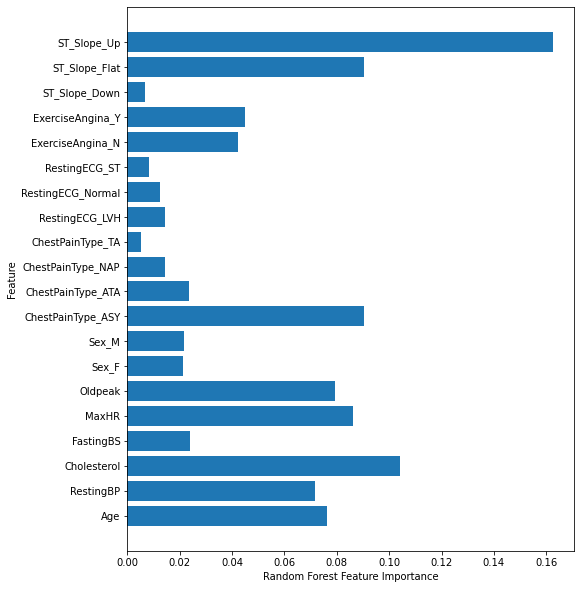

In [ ]:
# Which feature is the most important for the random forest?
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) # Creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) # Size of the graph
plt.barh(index,forest.feature_importances_,height=0.8)
plt.ylabel('Feature')
plt.yticks(index,predictors) # Feature names
plt.xlabel("Random Forest Feature Importance")
plt.show()

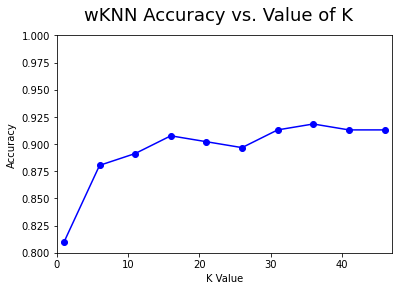

The most accurate K value was 0.9184782608695652


In [ ]:
# What should K be in weighted k nearest neighbors?
range_k = range(1, 50, 5)
k_accuracies = []

for k in range_k:
  curr_k = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  curr_k.fit(train_data, train_sln)
  curr_predictions = curr_k.predict(test_data)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  k_accuracies.append(curr_accuracy)

# Graphing the results
plt.suptitle('wKNN Accuracy vs. Value of K',fontsize = 18)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.plot(range_k, k_accuracies,'bo-')
plt.axis([0,range_k[-1]+1,.8,1])
plt.show()

print('The most accurate K value was', max(k_accuracies))

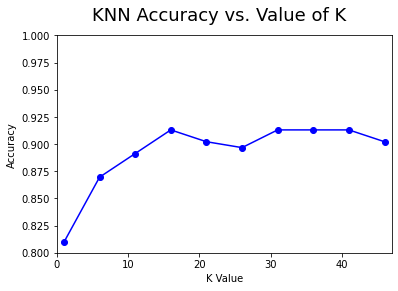

The most accurate K value was 0.9130434782608695


In [ ]:
# What should K be in regular k nearest neighbors?
range_k = range(1, 50, 5)
k_accuracies = []

for k in range_k:
  curr_k = neighbors.KNeighborsClassifier(n_neighbors = k)
  curr_k.fit(train_data, train_sln)
  curr_predictions = curr_k.predict(test_data)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  k_accuracies.append(curr_accuracy)

# Graphing the results
plt.suptitle('KNN Accuracy vs. Value of K',fontsize = 18)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.plot(range_k, k_accuracies,'bo-')
plt.axis([0,range_k[-1]+1,.8,1])
plt.show()

print('The most accurate K value was', max(k_accuracies))

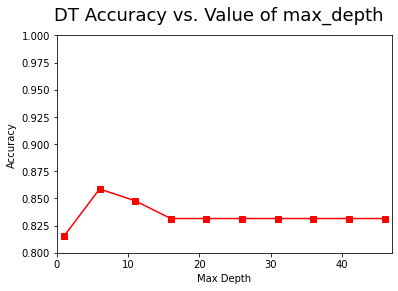

The most accurate depth was 0.8586956521739131


In [ ]:
# What should be the max depth of the decision tree?
range_depth = range(1, 50, 5)
dt_accuracies = []

for depth in range_depth:
  curr_depth = tree.DecisionTreeClassifier(max_depth = depth, random_state = 41)
  curr_depth.fit(train_data, train_sln)
  curr_predictions = curr_depth.predict(test_data)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  dt_accuracies.append(curr_accuracy)

# Graphing the results
plt.suptitle('DT Accuracy vs. Value of max_depth',fontsize = 18)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(range_depth, dt_accuracies,'rs-')
plt.axis([0,range_depth[-1]+1,.8,1])
plt.show()

print('The most accurate depth was', max(dt_accuracies))

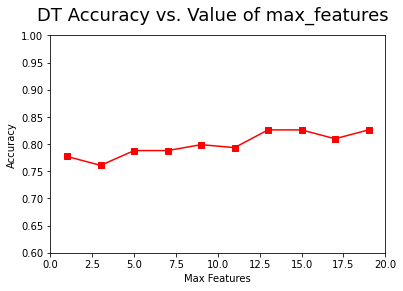

The most accurate features was 0.8260869565217391


In [ ]:
# What should the max features be for the decision tree?
range_features = range(1, 20, 2)
dt_accuracies = []

for features in range_features:
  curr_features = tree.DecisionTreeClassifier(max_features = features, random_state = 41)
  curr_features.fit(train_data, train_sln)
  curr_predictions = curr_features.predict(test_data)
  curr_accuracy = metrics.accuracy_score(test_sln, curr_predictions)
  dt_accuracies.append(curr_accuracy)

# Graphing the results
plt.suptitle('DT Accuracy vs. Value of max_features',fontsize = 18)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.plot(range_features, dt_accuracies,'rs-')
plt.axis([0,range_features[-1]+1,.6,1])
plt.show()

print('The most accurate features was', max(dt_accuracies))

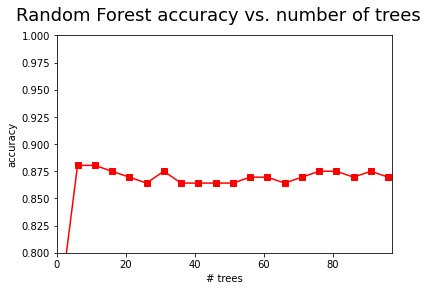

The most accuracate Forest was:  0.8804347826086957


In [ ]:
# How many trees should be in the random forest?
range_trees = range(1,100,5)
rf_accuracies = []

for n in range_trees: # FIlls the list rf_accuracies with the accuracy of random forests with
    curr_rf = RandomForestClassifier(n_estimators = n, random_state = 41)
    curr_rf.fit(train_data,train_sln)
    curr_predictions = curr_rf.predict(test_data)
    curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
    rf_accuracies.append(curr_accuracy)

# Graphing the results
plt.suptitle('Random Forest accuracy vs. number of trees',fontsize = 18)
plt.xlabel('# trees')
plt.ylabel('accuracy')
plt.plot(range_trees,rf_accuracies,'rs-')
plt.axis([0,range_trees[-1]+1,.8,1])

plt.show()

print('The most accuracate Forest was: ', max(rf_accuracies))

# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?

*One of the biggest challenges I encountered was setting up the data. For me it was hard to determine what to normalize, what didn't need to be, and ultimately I think I did a good job by just addressing the ones that stood out to me. When I made the confusion matrices, I had an issue where it was not displaying at all. What I needed to do was change the target column, HeartDisease, into strings rather than binary values. The function was having issues with having integers there. Ultimately I think while I did have to change my strategy slightly, it ended up being better. It makes the data more readable and clear. THe last challenge was deciding what to graph. I decided to stick with what I wanted to know about the data rather than what might be the most informative.*


# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*One insight I picked up from running this experiment is that it can take a lot to prepare data to use. Even though this was one of the cleaner datasets, if not the cleanest, it still require me to put in a good amount of thought and effort into making it usable. I think that what was most interesting was that there was one feature that was incredibly useful in making predictions. That column was ST_Slope_Up, and I looked it up to find out what it meant and found several studies that determined that it was important for determining heart disease and coronary artery disease, which matches what I did here.*

*Both models performed well, each getting about 90% accuracy. One thing I was taking a close look at was false positives and false negatives. Ideally false negatives would be minimized, which luckily were in both models. Each time the number of false negatives was lower which was a good sign. In general, I think this experiment was a good way to pull the class together. The experiment went well and was able to give a fairly accurate model of predicting heart disease. What these results mean is that by given basic information about an individual and several heart measurement statistics, a prediction made about if they have heart disease will be made with roughly 90% accuracy.*